In [167]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# 1. Basic Analysis of Stock Information

In [14]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# DataFrame with Adj Close for all stocks

In [63]:
all_stocks_adjclose = pd.DataFrame()
for stock in tech_list:
    all_stocks_adjclose[stock] = web.DataReader(stock, data_source = 'yahoo', start = start, end = end)['Adj Close']

In [64]:
all_stocks_adjclose.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,54.714626,1246.520020,137.791306,1768.329956
2019-09-26,54.432430,1241.390015,137.969284,1739.839966
2019-09-27,54.167561,1225.089966,136.179642,1725.449951
2019-09-30,55.442406,1219.000000,137.465027,1735.910034
2019-10-01,55.595886,1205.099976,135.527100,1735.650024


# DataFrame with Volume for all stocks

In [65]:
all_stocks_volumes = pd.DataFrame()
for stock in tech_list:
    all_stocks_volumes[stock] = web.DataReader(stock, data_source = 'yahoo', start = start, end = end)['Volume']

In [66]:
all_stocks_volumes.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,87613600.0,1453000,21382000.0,3493200
2019-09-26,75334000.0,1538000,17456600.0,3536800
2019-09-27,101408000.0,1353900,22477700.0,3907200
2019-09-30,103909600.0,1404100,17280900.0,2644700
2019-10-01,139223200.0,1273500,21466600.0,3084500


# DataFrame with all the prices

In [11]:
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [21]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,55.375000,54.285000,54.637501,55.257500,87613600.0,54.714626
2019-09-26,55.235001,54.707500,55.000000,54.972500,75334000.0,54.432430
2019-09-27,55.240002,54.320000,55.134998,54.705002,101408000.0,54.167561
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886


In [23]:
AAPL = web.DataReader('AAPL', data_source = 'yahoo', start = start, end = end)

In [24]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,55.375000,54.285000,54.637501,55.257500,87613600.0,54.714626
2019-09-26,55.235001,54.707500,55.000000,54.972500,75334000.0,54.432430
2019-09-27,55.240002,54.320000,55.134998,54.705002,101408000.0,54.167561
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886


In [22]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,1248.300049,1210.089966,1215.819946,1246.520020,1453000,1246.520020
2019-09-26,1245.000000,1232.267944,1241.959961,1241.390015,1538000,1241.390015
2019-09-27,1244.020020,1214.449951,1243.010010,1225.089966,1353900,1225.089966
2019-09-30,1226.000000,1212.300049,1220.969971,1219.000000,1404100,1219.000000
2019-10-01,1231.229980,1203.579956,1219.000000,1205.099976,1273500,1205.099976


In [25]:
GOOG = web.DataReader('GOOG', data_source = 'yahoo', start = start, end = end)

In [26]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,1248.300049,1210.089966,1215.819946,1246.520020,1453000,1246.520020
2019-09-26,1245.000000,1232.267944,1241.959961,1241.390015,1538000,1241.390015
2019-09-27,1244.020020,1214.449951,1243.010010,1225.089966,1353900,1225.089966
2019-09-30,1226.000000,1212.300049,1220.969971,1219.000000,1404100,1219.000000
2019-10-01,1231.229980,1203.579956,1219.000000,1205.099976,1273500,1205.099976


# plot out the volume and closing price of the stocks

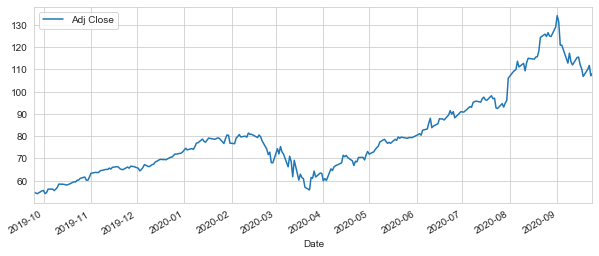

In [27]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

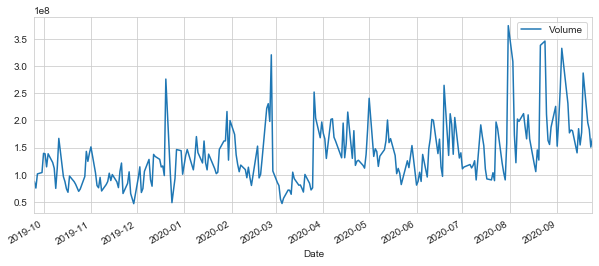

In [28]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

# Calculate the moving average for AAPL

In [47]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma).mean()

In [48]:
AAPL.head(30)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 3 days
Date,,,,,,,,,,
2019-09-25,55.375000,54.285000,54.637501,55.257500,87613600.0,54.714626,NaN,NaN,NaN,NaN
2019-09-26,55.235001,54.707500,55.000000,54.972500,75334000.0,54.432430,NaN,NaN,NaN,NaN
2019-09-27,55.240002,54.320000,55.134998,54.705002,101408000.0,54.167561,NaN,NaN,NaN,54.438206
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406,NaN,NaN,NaN,54.680799
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886,NaN,NaN,NaN,55.068618
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213,NaN,NaN,NaN,55.080168
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643,NaN,NaN,NaN,54.820248
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800.0,56.194942,NaN,NaN,NaN,55.019933
2019-10-07,57.482498,56.459999,56.567501,56.764999,122306000.0,56.207317,NaN,NaN,NaN,55.688301


# Plot all the additional Moving Average for AAPL

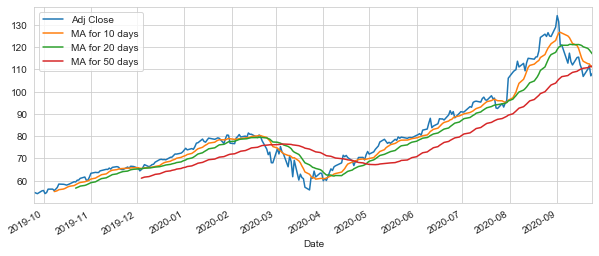

In [50]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))
#we can see that as we plot the MA for more days, we get a smoother line (it is not as relying on the daily fluctuations)

# 2.  Daily Return Analysis

# Daily changes of the stock = on every given day, what is the % return of the money

In [51]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [52]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 3 days,Daily Return
Date,,,,,,,,,,,
2019-09-25,55.375000,54.285000,54.637501,55.257500,87613600.0,54.714626,NaN,NaN,NaN,NaN,NaN
2019-09-26,55.235001,54.707500,55.000000,54.972500,75334000.0,54.432430,NaN,NaN,NaN,NaN,-0.005158
2019-09-27,55.240002,54.320000,55.134998,54.705002,101408000.0,54.167561,NaN,NaN,NaN,54.438206,-0.004866
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406,NaN,NaN,NaN,54.680799,0.023535
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886,NaN,NaN,NaN,55.068618,0.002768


In [56]:
#del AAPL['MA for 3 days']

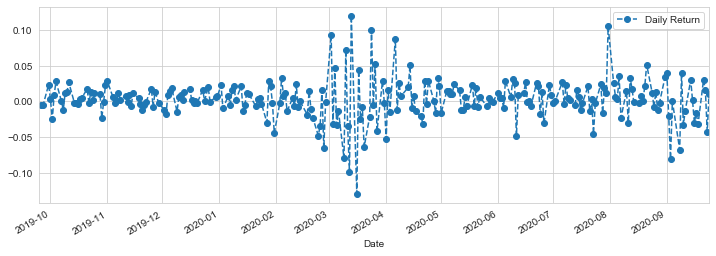

In [59]:
AAPL['Daily Return'].plot(figsize = (12,4), legend = True, linestyle = '--', marker = 'o')

# Overall look at the average daily return using a histogram. 
We'll use seaborn to create both a histogram and kde plot on the same figure.

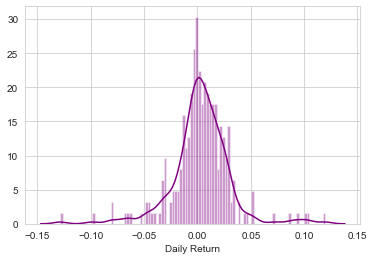

In [60]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color= 'purple')

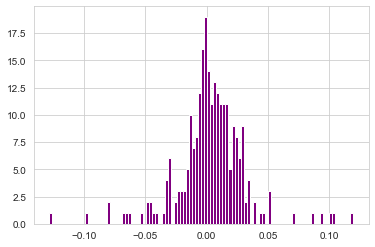

In [62]:
AAPL['Daily Return'].hist(bins = 100, color = 'purple')

# Daily return for all the stocks

In [67]:
all_stocks_adjclose.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,54.714626,1246.520020,137.791306,1768.329956
2019-09-26,54.432430,1241.390015,137.969284,1739.839966
2019-09-27,54.167561,1225.089966,136.179642,1725.449951
2019-09-30,55.442406,1219.000000,137.465027,1735.910034
2019-10-01,55.595886,1205.099976,135.527100,1735.650024


Normalization to 100

In [68]:
all_stocks_adjclose.iloc[0]

AAPL      54.714626
GOOG    1246.520020
MSFT     137.791306
AMZN    1768.329956
Name: 2019-09-25 00:00:00, dtype: float64

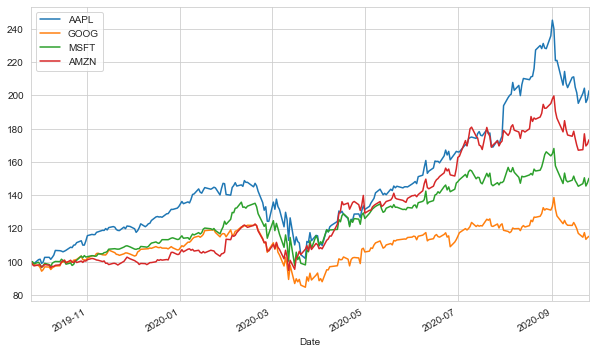

In [71]:
(all_stocks_adjclose / all_stocks_adjclose.iloc[0] *100).plot(figsize = (10,6))

Daily Returns of the portfolio (all the stocks)

In [72]:
portf_ret = all_stocks_adjclose.pct_change()

In [74]:
portf_ret.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,NaN,NaN,NaN,NaN
2019-09-26,-0.005158,-0.004115,0.001292,-0.016111
2019-09-27,-0.004866,-0.013130,-0.012971,-0.008271
2019-09-30,0.023535,-0.004971,0.009439,0.006062
2019-10-01,0.002768,-0.011403,-0.014098,-0.000150


- Compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.
- pearsonr value shows how correlated the daily percentage returns are (1 means they are perfectly correlated; as it moves lower, they are less correlated)

C:\Users\mariu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


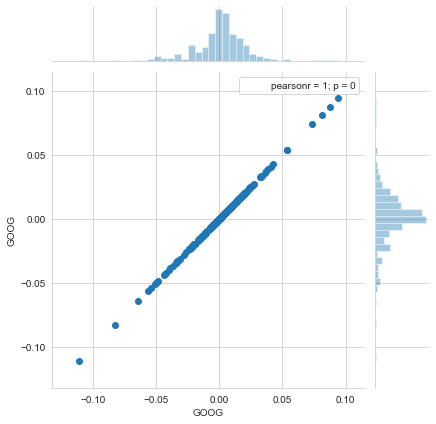

In [168]:
# Comparing Google to itself should show a perfectly linear relationship
import scipy.stats as stats
sns.jointplot('GOOG','GOOG',portf_ret, kind = 'scatter').annotate(stats.pearsonr)

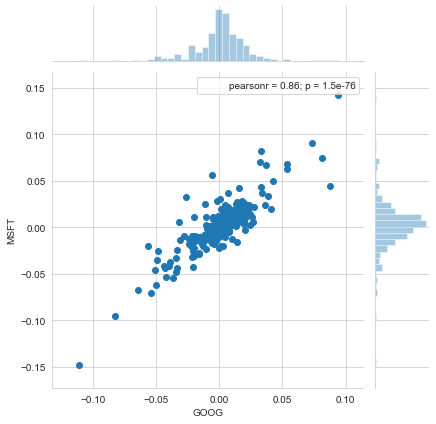

In [169]:
# compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',portf_ret, kind = 'scatter').annotate(stats.pearsonr)

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks. 
We can use sns.pairplot() to automatically create this plot

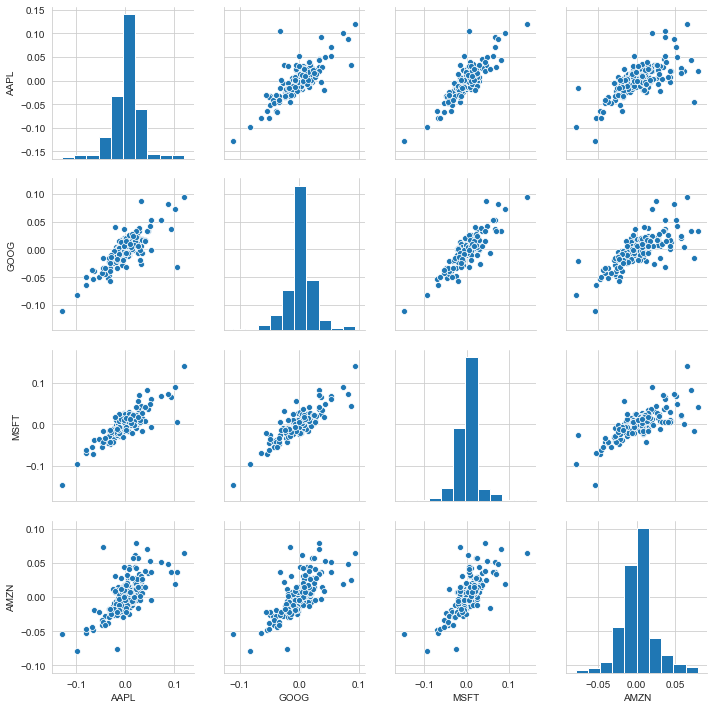

In [78]:
sns.pairplot(portf_ret.dropna())

Above we can see all the relationships on daily returns between all the stocks. 
A quick glance shows an interesting correlation between Google and Amazon daily returns. 
It might be interesting to investigate that individual comaprison. 
While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure,
including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 

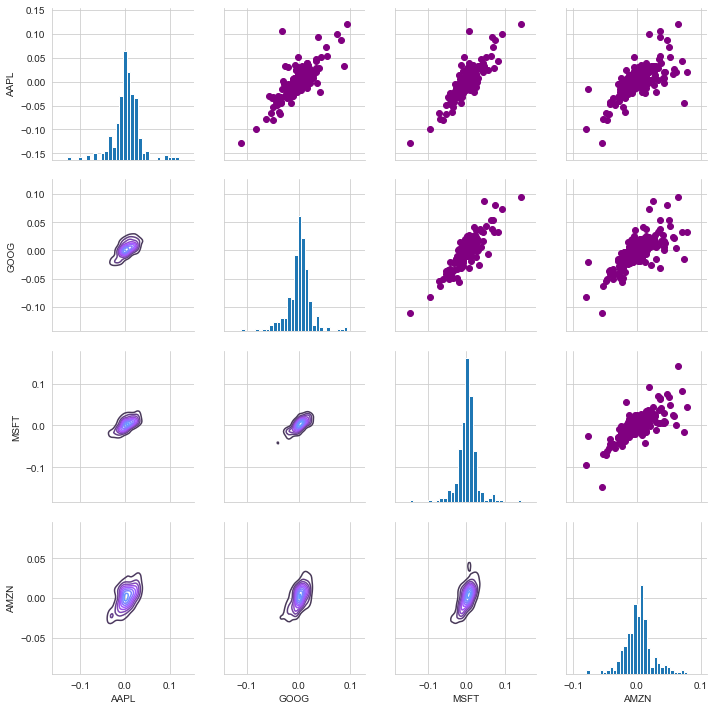

In [80]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(portf_ret.dropna())
# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color = 'purple')
# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins = 30)

We can also analyze the correlation of the closing prices using this exact same technique. 


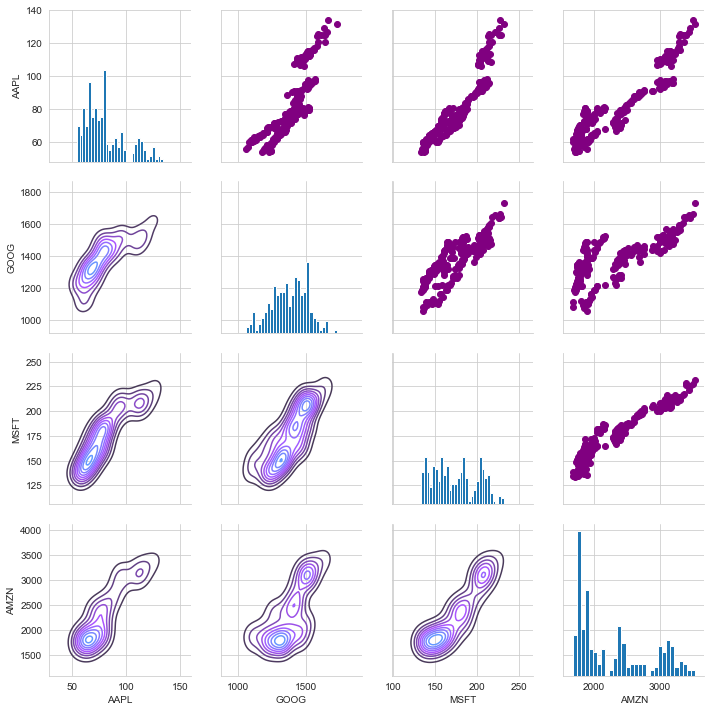

In [82]:
adj_prices_fig = sns.PairGrid(all_stocks_adjclose)
adj_prices_fig.map_upper(plt.scatter, color = 'purple')
adj_prices_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
adj_prices_fig.map_diag(plt.hist, bins= 30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily 
return values. 
By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

In [85]:
portf_ret.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,NaN,NaN,NaN,NaN
2019-09-26,-0.005158,-0.004115,0.001292,-0.016111
2019-09-27,-0.004866,-0.013130,-0.012971,-0.008271
2019-09-30,0.023535,-0.004971,0.009439,0.006062
2019-10-01,0.002768,-0.011403,-0.014098,-0.000150


In [86]:
corr = portf_ret.corr()

In [87]:
corr

,AAPL,GOOG,MSFT,AMZN
AAPL,1.000000,0.780048,0.846370,0.670302
GOOG,0.780048,1.000000,0.863457,0.701491
MSFT,0.846370,0.863457,1.000000,0.725012
AMZN,0.670302,0.701491,0.725012,1.000000


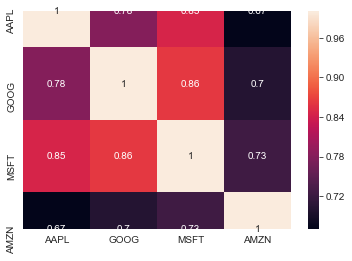

In [172]:
sns.heatmap(corr, annot = True)

In [173]:
corr_prices = all_stocks_adjclose.corr()

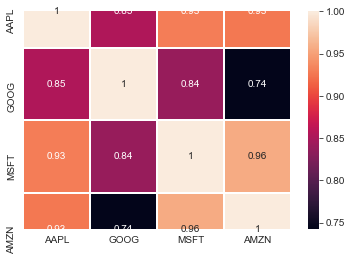

In [179]:
sns.heatmap(corr_prices, annot = True)

We see that Microsoft and Google had the strongest correlation of daily stock return. 


# 3. Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

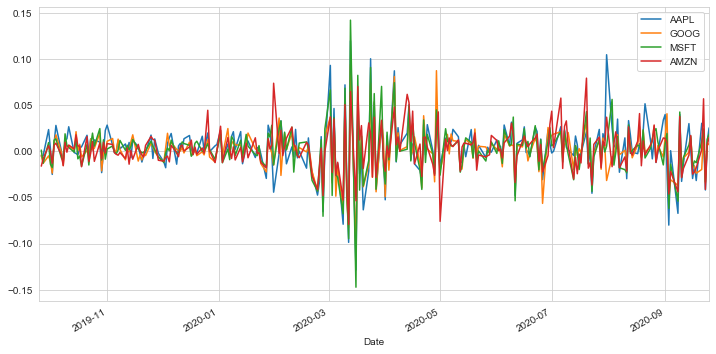

In [103]:
portf_ret.plot(figsize = (12,6))

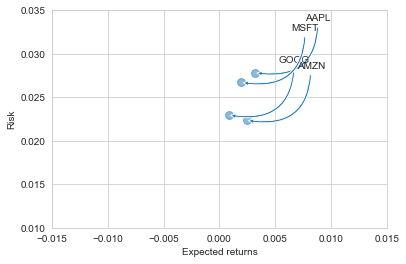

In [109]:
#define a new DataFrame as a cleaned version of the portf_returns DataFrame
rets = portf_ret.dropna()
#define the area of the circles for the scatterplot; otherwise, they will be very small and unable to be seen
area = np.pi*20
#use plt.scatter with the mean on the x axis, std on the y axis 
plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area)
plt.ylim([0.01,0.035])
plt.xlim([-0.015,0.015])
plt.xlabel('Expected returns')
plt.ylabel('Risk')
#for every column in rets dataframe, set x equal to the mean of that column, and set y to the std of that column 
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=-0.6'))
    

# Value at Risk

define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. 

# 1. Value at risk using the "bootstrap" method

- calculate the empirical quantiles from a histogram of daily returns.
- repeat the daily returns histogram for Apple stock.

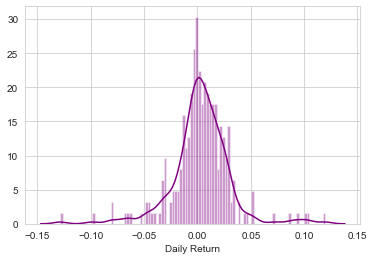

In [110]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

- use quantiles (which are builtin in pandas) to get the risk value for the stock.

# Quantile of AAPL

In [111]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.04161985444024205

- The 0.05 empirical quantile of daily returns is at -0.041. 
- That means that with 95% confidence, our worst daily loss will not exceed 4.1%. 
- If we have a 1 million dollar investment, our one-day 5% VaR is 0.041 * 1,000,000 = $41,000.

- repeat this for the other stocks in our portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

# Quantile of GOOG

In [112]:
rets['GOOG'].quantile(0.05)

-0.03899236001034636

- The 0.05 empirical quantile of daily returns is at -0.038.

- That means that with 95% confidence, our worst daily loss will not exceed 3.8%.

- If we have a 1 million dollar investment, our one-day 5% VaR is 0.038 * 1,000,000 = $38,000.

# Quantile of MSFT

In [113]:
rets['MSFT'].quantile(0.05)

-0.041179413372621564

- The 0.05 empirical quantile of daily returns is at -0.0411.

- That means that with 95% confidence (95% of the times we would do this), our worst daily loss will not exceed 4.1%.

- If we have a 1 million dollar investment, our one-day 5% VaR is 0.041 * 1,000,000 = $41,000.
- every day, at worst we lose 41.000, 95% of the times

# Quantile of AMZN

In [115]:
rets['AMZN'].quantile(0.05)

-0.029163258435937783

- The 0.05 empirical quantile of daily returns is at -0.029.

- That means that with 95% confidence, our worst daily loss will not exceed 2.9%.

- If we have a 1 million dollar investment, our one-day 5% VaR is 0.029 * 1,000,000 = $29,000.

# Value at Risk using the Monte Carlo method


Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. 
After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

- We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. 
- This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the 
efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is
    "conditionally independent" of past price movements.

- This means that the past information on the price of a stock is independent of where the stock price will be in the future,
basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

- The equation for geometric Browninan motion is given by the following equation:
    
ΔSS= mu Δt+σϵΔt−−−√
- Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the 
returns, t is time, and epsilon is the random variable.

- We can multiply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

    ΔS=S(μΔt+σϵΔt−−−√)
- Now we see that the change in the stock price is the current stock price multiplied by two terms. 
- The first term is known as "drift", which is the average daily return multiplied by the change of time. 
- The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will 
randomly push the stock price up or down. 
- By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where 
we might expect the stock price to be.

- To demonstrate a basic Monte Carlo method, we will start with just a few simulations. 
- First we'll define the variables we'll be using the Google DataFrame GOOG

# 1. Setting number of days, mu, sigma

In [116]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [117]:
mu

0.0008298285776628514

In [118]:
sigma

0.02297076113944085

# 2. Create a function based on the equation

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated from our daily returns

In [123]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    # Create 3 arrays with 0 values, with the length the number of days we want to run it
    # Define a price array - an array of 0s with the same length of days
    price = np.zeros(days)
    price[0] = start_price  #set the first price = starting price
    # Schock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    # for every day, we calculate shock term grabbed from a normal distribution (shock term is equal to the second term of the 
    #equation sigma * epsilon * sqrt of deltat -> instead of inputting an epsilon, we set epsilon equal to a normal distribution 
    #defined by sigma * sqrt of delta t); there are various ways to choose the random epsilon value, but in this case we use 
    #random normal distribution
    for x in range(1,days):
        
        # Calculate Schock - grab it from a normal distribution, with the center around mu*dt, 
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift - equal to the first term of the equation
        drift[x] = mu * dt
        # Calculate Price = previous price + delta S value
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [181]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,1248.300049,1210.089966,1215.819946,1246.520020,1453000,1246.520020
2019-09-26,1245.000000,1232.267944,1241.959961,1241.390015,1538000,1241.390015
2019-09-27,1244.020020,1214.449951,1243.010010,1225.089966,1353900,1225.089966
2019-09-30,1226.000000,1212.300049,1220.969971,1219.000000,1404100,1219.000000
2019-10-01,1231.229980,1203.579956,1219.000000,1205.099976,1273500,1205.099976


In [182]:
GOOG.iloc[0,0]

1248.300048828125

# 3. Run the function 100 times

- We will simulate a year's worth of random trials using MonteCarlo method

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

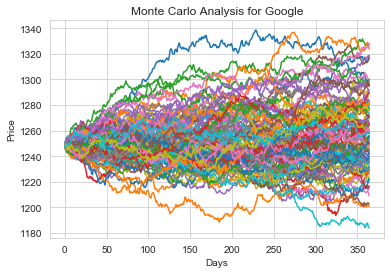

In [183]:
# Get start price from GOOG.head()
start_price = GOOG.iloc[0,0]

#run the MonteCarlo simulation 100 times
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

# 4. Get an array of the ending price points (array of simulations)

Let's go ahead and get a histogram of the end results for a much larger run.

In [184]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
#So, for 10000 runs, every run, that point in the simulation, is going to be defined as the end price (the very last price on
#the plot above) -> we are gathering an array of all the ending price points 

# 5. Plot the simulations

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use quantile to define our risk for this stock.

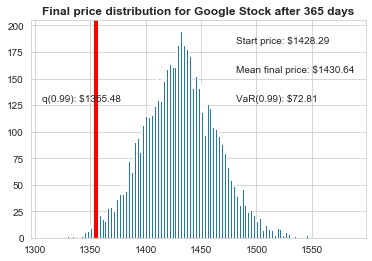

In [162]:
# Now we'lll define q as the 1% empirical quantile, this basically means that 99% of the values should fit within our output
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

- We have a histogram of all the final prices; we have start_price = 1428, and Mean final price = 1430, which means it is a quite
stable stock
- we have the red line drawed at the 1% quartile, and this line is at $1355 (start_price - VaR) 
- the Value at Risk for Google is $72.81
- 99% of the time that we run this simulation, the amount of money we would lose at most is $72.81 (over a year)

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $72.81 for every investment of 1428.29 (the price of one initial google stock).

This basically means for every initial stock you purchase your putting about $72.81 at risk 99% of the time from our Monte Carlo Simulation.

# Value at Risk using Z

In [128]:
all_stocks_adjclose.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-25,54.714626,1246.520020,137.791306,1768.329956
2019-09-26,54.432430,1241.390015,137.969284,1739.839966
2019-09-27,54.167561,1225.089966,136.179642,1725.449951
2019-09-30,55.442406,1219.000000,137.465027,1735.910034
2019-10-01,55.595886,1205.099976,135.527100,1735.650024


In [134]:
goog_adj = pd.DataFrame(all_stocks_adjclose['GOOG'])

In [135]:
goog_adj.head()

,GOOG
Date,
2019-09-25,1246.520020
2019-09-26,1241.390015
2019-09-27,1225.089966
2019-09-30,1219.000000
2019-10-01,1205.099976


In [137]:
goog_log_returns = np.log(1+goog_adj.pct_change())
goog_log_returns.head()

,GOOG
Date,
2019-09-25,NaN
2019-09-26,-0.004124
2019-09-27,-0.013217
2019-09-30,-0.004983
2019-10-01,-0.011468


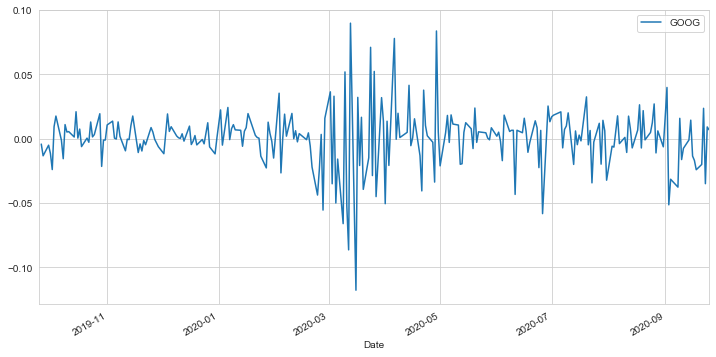

In [139]:
goog_log_returns.plot(figsize = (12,6))

In [186]:
u = goog_log_returns.mean()
u

GOOG    0.000566
dtype: float64

In [187]:
var = goog_log_returns.var()
var

GOOG    0.000531
dtype: float64

In [144]:
drift = u - (0.5 * var)

In [145]:
drift

GOOG    0.0003
dtype: float64

In [146]:
stdev = goog_log_returns.std()

In [147]:
np.array(drift)

array([0.00029995])

In [148]:
stdev.values

array([0.02305352])

In [150]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

In [151]:
x = np.random.rand(10,2)
x

array([[0.33653785, 0.62955833],
       [0.19534313, 0.82891542],
       [0.85030711, 0.6251261 ],
       ...,
       [0.09284128, 0.21889568],
       [0.08271503, 0.18272463],
       [0.67331441, 0.10229883]])

In [152]:
norm.ppf(x)

array([[-0.42193057,  0.33068379],
       [-0.8583735 ,  0.94988801],
       [ 1.03775148,  0.31897193],
       ...,
       [-1.32345965, -0.77592822],
       [-1.3870384 , -0.90503045],
       [ 0.44908383, -1.26856104]])

In [153]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.21219955,  0.04225895],
       [ 0.03082033, -0.91089814],
       [ 1.07960075,  1.2619266 ],
       ...,
       [-0.9766733 , -0.33591475],
       [ 0.74699349,  1.9931935 ],
       [-0.38618761,  0.0933392 ]])

In [154]:
t_intervals = 1000
iterations = 10
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01262281, 1.02244921, 1.00395562, ..., 0.94757949, 1.02617358,
        0.97939522],
       [1.01268671, 0.96985395, 1.00441816, ..., 0.98704846, 0.98056444,
        1.01491106],
       [1.04193941, 1.00670337, 1.0266788 , ..., 0.98219096, 0.94819115,
        1.00380679],
       ...,
       [0.97122518, 1.02085321, 1.03498199, ..., 1.00385414, 1.0051051 ,
        1.00730742],
       [0.96252583, 0.99811107, 1.01759694, ..., 0.97991005, 1.013652  ,
        0.99196051],
       [1.02269296, 1.01920236, 1.02984965, ..., 1.01297213, 0.97113488,
        1.01956844]])

In [155]:
S0 = goog_adj.iloc[-1]
S0

GOOG    1438.314941
Name: 2020-09-25 00:00:00, dtype: float64

In [163]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
price_list[0] = S0
price_list

array([[1438.31494141, 1438.31494141, 1438.31494141, ..., 1438.31494141,
        1438.31494141, 1438.31494141],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [165]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

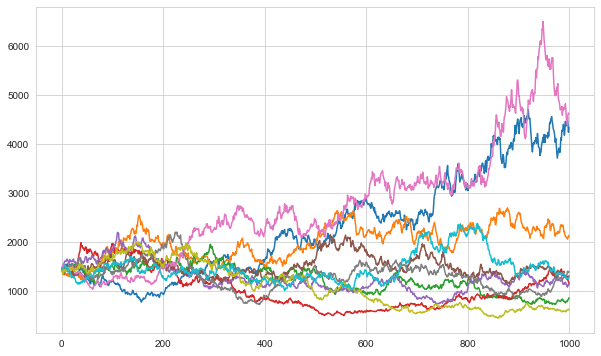

In [166]:
plt.figure(figsize = (10,6))
plt.plot(price_list)